In [1]:
import sys, os
# import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import random
mpl.rcParams['font.size'] = 14

In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios

/data/nriemer/c/yicenl2/git/project/partmc/scenarios


In [3]:
# Read data
directory = 'sce_completed/scenarios'
gamma_pop = np.zeros((2,100,25))
chi = np.zeros((100,25))
bulk_spec_mass = np.zeros((4,100,25))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce_ind, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce_ind, :] = ncf.variables["gamma_pop_mix"].data
            time = ncf.variables["time"].data/3600
            bulk_spec_mass[0, sce_ind, :] = ncf.variables["tot_dry_mass_conc"].data*1e9
            bulk_spec_mass[1, sce_ind, :] = ncf.variables["tot_no3_mass_conc"].data*1e9
            bulk_spec_mass[2, sce_ind, :] = ncf.variables["bulk_poa_masses"].data*1e9
            bulk_spec_mass[3, sce_ind, :] = ncf.variables["bulk_soa_masses"].data*1e9
            #time = ncf.variables["time"].data/3600
            chi[sce_ind, :] = ncf.variables["chi"].data
            
d = {"bulk_no3_masses": bulk_spec_mass[1, :, :].ravel(), # convert to percentage
     "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
     "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
     "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),
     "org": bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()}
df = pd.DataFrame(data=d)

<ipython-input-3-799692ae4800>:24: RuntimeWarning: invalid value encountered in true_divide
  "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
<ipython-input-3-799692ae4800>:25: RuntimeWarning: invalid value encountered in true_divide
  "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
<ipython-input-3-799692ae4800>:26: RuntimeWarning: invalid value encountered in true_divide
  "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),


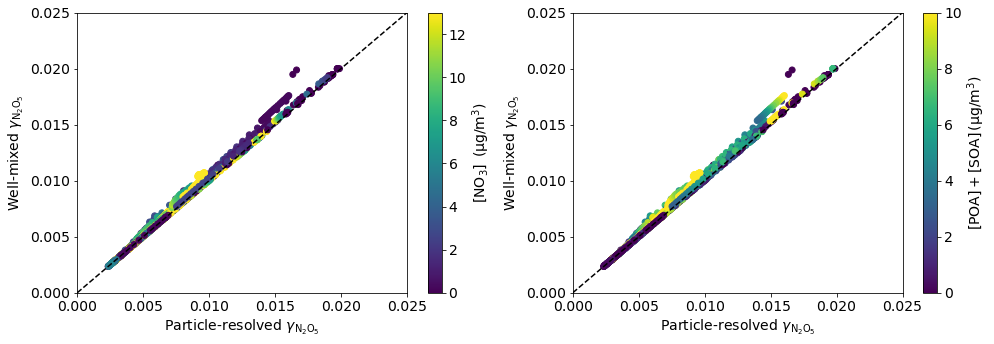

In [4]:
# Make plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[1,:,:].ravel(), c=df["bulk_no3_masses"])
cbar = plt.colorbar(a)
plt.clim(0,13)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm NO_3]\,\ (µg/m^3)$')
plt.tight_layout()

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(gamma_pop[0,:,:].ravel(), gamma_pop[1,:,:].ravel(), c=df["org"])
cbar = plt.colorbar(a)
plt.clim(0,10)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm POA]+[\rm SOA] \, (\mu g /m^3)$')
plt.tight_layout()

In [5]:
directory = 'sce_completed/scenarios'
gamma_pop = np.zeros((2,100,25))
bulk_spec_mass = np.zeros((4,100,25)) #tot_wet, tot_core

#Bulk properties
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            #print(filename[-30:-27])
            sce_ind      =  int(filename[-30:-27])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce_ind, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce_ind, :] = ncf.variables["gamma_pop_mix"].data
            time = ncf.variables["time"].data/3600
            bulk_spec_mass[0, sce_ind, :] = ncf.variables["tot_dry_mass_conc"].data*1e9
            bulk_spec_mass[1, sce_ind, :] = ncf.variables["tot_no3_mass_conc"].data*1e9
            bulk_spec_mass[2, sce_ind, :] = ncf.variables["bulk_poa_masses"].data*1e9
            bulk_spec_mass[3, sce_ind, :] = ncf.variables["bulk_soa_masses"].data*1e9

gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
                   gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
# nighttime cases only          
d = {"gamma_pop_pr": gamma_pop[0,:,:].ravel(),
     "gamma_pop_mix": gamma_pop[1,:,:].ravel(),
     "gamma_pop_error": gamma_pop_error * 100,
     "bulk_no3_masses": bulk_spec_mass[1, :, :].ravel(), # convert to percentage
     "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
     "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
     "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),
     "org": bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()}
df = pd.DataFrame(data=d)
case_index = df.index.values
sce_index  = (case_index/25).astype(int)
hour_index = case_index % 25
df_ngt = df[((df.index.values % 25) >= 12) & ((df.index.values % 25) < 24)]
print(df_ngt.sort_values(by='gamma_pop_error', ascending=False))

df_on = df_ngt[(np.abs(df_ngt["gamma_pop_error"]) < 5)]
df_above = df_ngt[((df_ngt["gamma_pop_error"]) >= 5)]
df_below = df_ngt[((df_ngt["gamma_pop_error"]) <= -5)]


      gamma_pop_pr  gamma_pop_mix  gamma_pop_error  bulk_no3_masses  no3_frac  \
217       0.005865       0.006859        16.937354         3.060290  0.096543   
218       0.005485       0.006311        15.064636         3.086777  0.113432   
215       0.005822       0.006589        13.168881         2.837942  0.111855   
216       0.005566       0.006273        12.707344         2.919010  0.120085   
1969      0.007782       0.008750        12.437974         8.529504  0.220413   
...            ...            ...              ...              ...       ...   
2494           NaN            NaN              NaN         0.000000       NaN   
2495           NaN            NaN              NaN         0.000000       NaN   
2496           NaN            NaN              NaN         0.000000       NaN   
2497           NaN            NaN              NaN         0.000000       NaN   
2498           NaN            NaN              NaN         0.000000       NaN   

       no3/org   org/no3   

<ipython-input-5-1647842db338>:28: RuntimeWarning: invalid value encountered in true_divide
  "no3_frac": bulk_spec_mass[1,:,:].ravel()/bulk_spec_mass[0,:,:].ravel(),
<ipython-input-5-1647842db338>:29: RuntimeWarning: invalid value encountered in true_divide
  "no3/org": bulk_spec_mass[1,:,:].ravel()/(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel()),
<ipython-input-5-1647842db338>:30: RuntimeWarning: invalid value encountered in true_divide
  "org/no3":(bulk_spec_mass[2,:,:].ravel()+bulk_spec_mass[3,:,:].ravel())/bulk_spec_mass[1,:,:].ravel(),


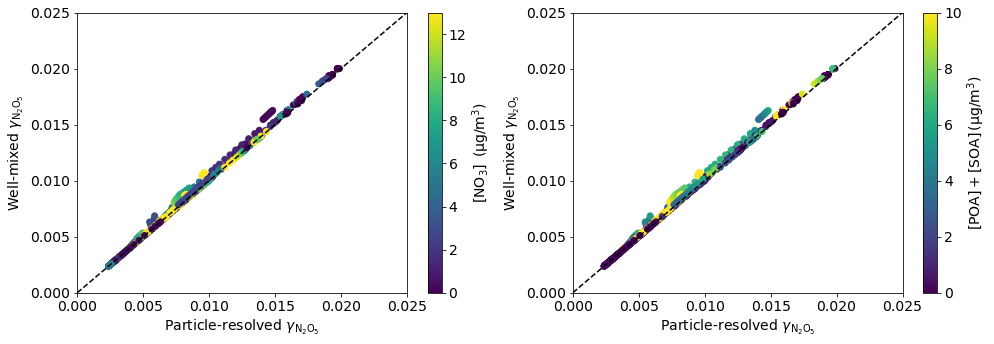

In [6]:
# Make plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(df_ngt["gamma_pop_pr"].ravel(), df_ngt["gamma_pop_mix"].ravel(), c=df_ngt["bulk_no3_masses"])
cbar = plt.colorbar(a)
plt.clim(0,13)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm NO_3]\,\ (µg/m^3)$')
plt.tight_layout()

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(df_ngt["gamma_pop_pr"].ravel(), df_ngt["gamma_pop_mix"].ravel(), c=df_ngt["org"])
cbar = plt.colorbar(a)
plt.clim(0,10)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm POA]+[\rm SOA] \, (\mu g /m^3)$')
plt.tight_layout()

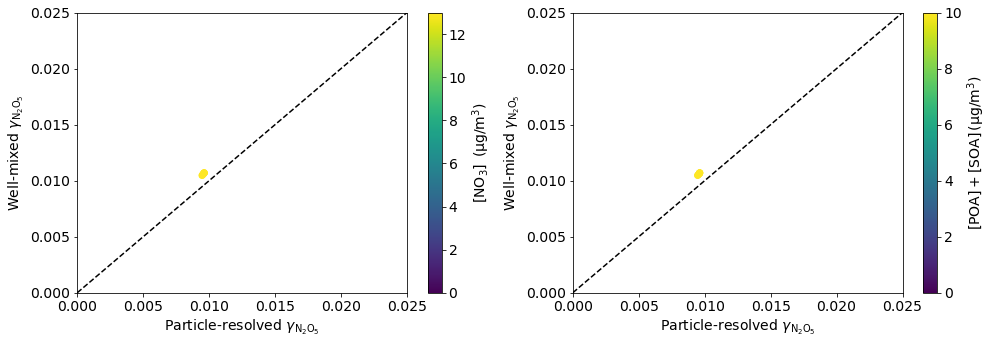

In [7]:
# Make plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(df.loc[2062:2073]["gamma_pop_pr"].ravel(), df.loc[2062:2073]["gamma_pop_mix"].ravel(), 
                c=df.loc[2062:2073]["bulk_no3_masses"])
cbar = plt.colorbar(a)
plt.clim(0,13)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm NO_3]\,\ (µg/m^3)$')
plt.tight_layout()

plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'--', color='k')
a = plt.scatter(df.loc[2062:2073]["gamma_pop_pr"].ravel(), df.loc[2062:2073]["gamma_pop_mix"].ravel(), 
                c=df.loc[2062:2073]["org"])
cbar = plt.colorbar(a)
plt.clim(0,10)
plt.xlabel(r'Particle-resolved $\gamma_{\rm N_2O_5}$')
plt.ylabel(r'Well-mixed $\gamma_{\rm N_2O_5}$')
cbar.ax.set_ylabel(r'$[\rm POA]+[\rm SOA] \, (\mu g /m^3)$')
plt.tight_layout()

In [8]:
print(df.loc[2062:2073]["gamma_pop_pr"])
print(df.loc[2061,2073]["gamma_pop_mix"])

2062    0.009595
2063    0.009618
2064    0.009599
2065    0.009630
2066    0.009619
2067    0.009618
2068    0.009591
2069    0.009580
2070    0.009581
2071    0.009512
2072    0.009482
2073    0.009458
Name: gamma_pop_pr, dtype: float64


KeyError: 2073

In [9]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(df_above.sort_values(by='gamma_pop_error', ascending=False))
print(df_above)
case_index = df_above.index.values
sce_index  = (case_index/25).astype(int)
hour_index = case_index % 25
print(sce_index)
print(hour_index)


      gamma_pop_pr  gamma_pop_mix  gamma_pop_error  bulk_no3_masses  no3_frac  \
217       0.005865       0.006859        16.937354         3.060290  0.096543   
218       0.005485       0.006311        15.064636         3.086777  0.113432   
215       0.005822       0.006589        13.168881         2.837942  0.111855   
216       0.005566       0.006273        12.707344         2.919010  0.120085   
1969      0.007782       0.008750        12.437974         8.529504  0.220413   
214       0.005904       0.006635        12.378697         2.820728  0.116061   
1968      0.007686       0.008624        12.197759         8.977263  0.219563   
1970      0.007888       0.008834        11.990047         8.193377  0.221068   
1967      0.007570       0.008454        11.664001         9.300183  0.215905   
2062      0.009595       0.010683        11.344521        22.640744  0.054850   
1966      0.007509       0.008354        11.256751         9.711884  0.212487   
1971      0.008078       0.0

In [10]:
print(df_on.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_on.index.values
sce_index  = (case_index/25).astype(int)
hour_index = case_index % 25
print(sce_index)
print(hour_index)
# pd.set_option('max_rows', 20)

      gamma_pop_pr  gamma_pop_mix  gamma_pop_error  bulk_no3_masses  no3_frac  \
220       0.004358       0.004545         4.293406         3.081391  0.235155   
1038      0.013809       0.014396         4.256695         0.716899  0.028770   
988       0.012632       0.013164         4.217134         0.372429  0.025658   
995       0.011984       0.012487         4.202541         0.316194  0.030936   
992       0.012267       0.012782         4.200338         0.335102  0.028612   
994       0.012087       0.012594         4.200059         0.320458  0.030092   
993       0.012175       0.012686         4.199892         0.328865  0.029361   
987       0.012742       0.013277         4.198087         0.377633  0.024826   
991       0.012349       0.012867         4.195829         0.344726  0.027991   
990       0.012428       0.012950         4.195637         0.356560  0.027363   
989       0.012511       0.013036         4.192390         0.365912  0.026699   
996       0.011849       0.0

In [11]:
print(df_below.sort_values(by='gamma_pop_error', ascending=False))
case_index = df_below.index.values
sce_index  = (case_index/25).astype(int)
hour_index = case_index % 25
print(sce_index)
print(hour_index)

Empty DataFrame
Columns: [gamma_pop_pr, gamma_pop_mix, gamma_pop_error, bulk_no3_masses, no3_frac, no3/org, org/no3, org]
Index: []
[]
[]


(199419, 5)
(213581, 5)
(148583, 5)
(156068, 5)
(148765, 5)
(241682, 5)
(142818, 5)
(214829, 5)
(140726, 5)
(188548, 5)
(181190, 5)
(257572, 5)
(257246, 5)
(188086, 7)
(219728, 5)


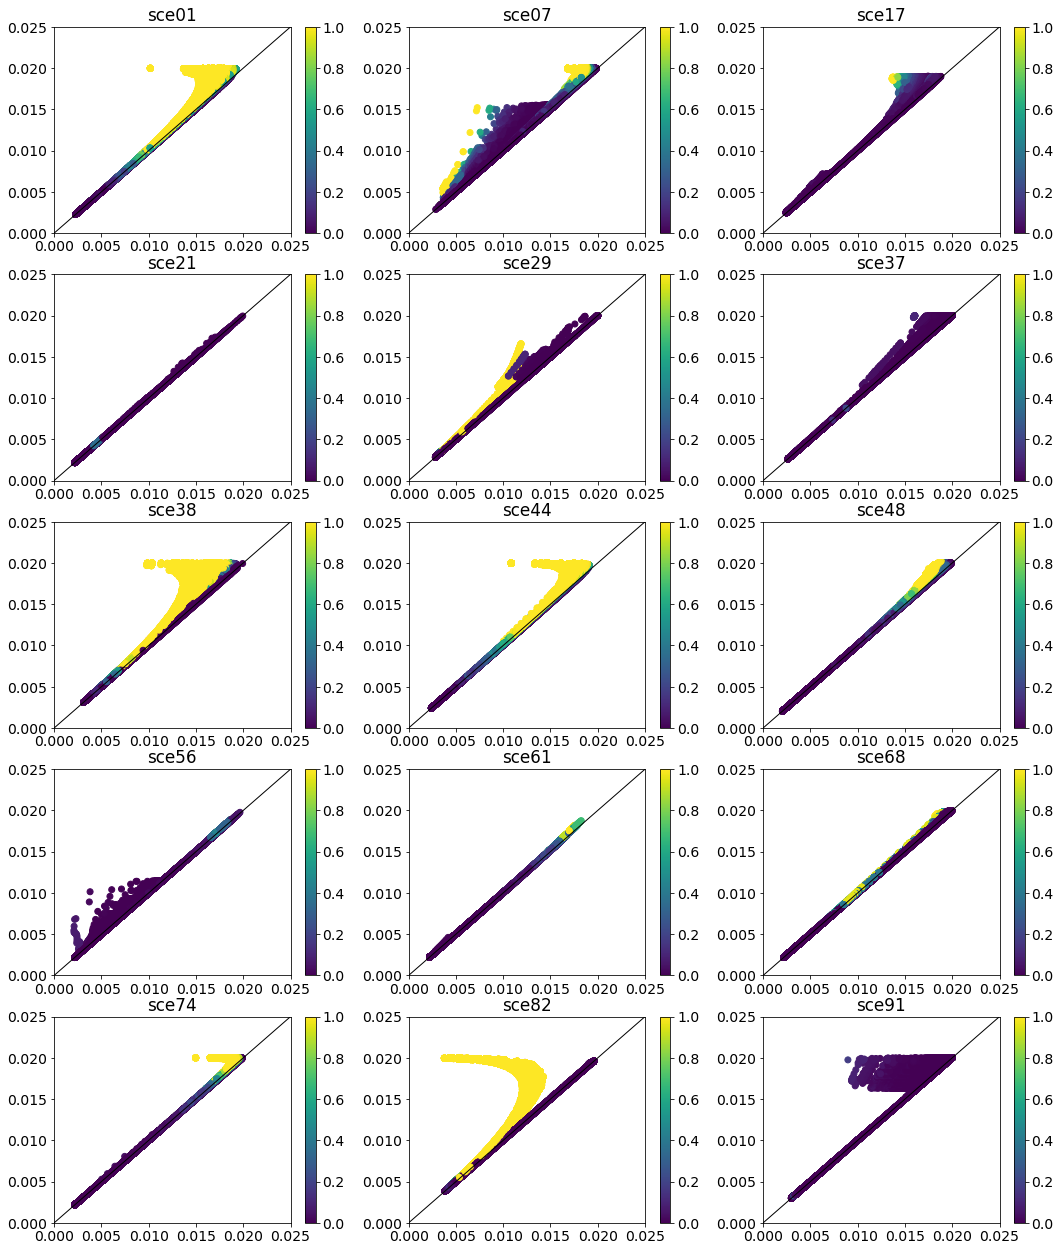

In [12]:
s = pd.Series(['01','07','17','21','29','37','38','44','48','56','61','68','74','82','91'])
plt.figure(figsize=(18,22))

for i in range(15):
    f_i="sce_completed/scenarios/scenario_00" + s[i] + "/gamma_part.csv"
    df_i = pd.read_csv(f_i, delim_whitespace=True, header=None)
    print(df_i.shape)
    
    plt.subplot(5,3,i+1)
    plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
    plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
    a = plt.scatter(df_i.iloc[:, 1].ravel(), df_i.iloc[:, 2].ravel(), c=df_i.iloc[:, 3].ravel()*1e12)#s=30,facecolors='none', edgecolors='k')#, c=df_ngt["chi"].ravel())
    cbar = plt.colorbar(a)
    plt.clim(0,1)
    #plt.xlabel(r'Particle-Resolved $\gamma_{\rm pop,PR}$')
    #plt.ylabel(r'Well-Mixed $\gamma_{\rm pop,MIX}$')
    #cbar.ax.set_ylabel('Organic Mass' + r'$(ng /m^3)$')
    plt.title('sce' + s[i])

In [13]:
f1 = "sce_completed/scenarios/scenario_0082/gamma_part.csv"

df = pd.read_csv(f1, delim_whitespace=True, header=None)
print(df.shape)

(188086, 7)


Text(0.5, 1.0, 'sce82')

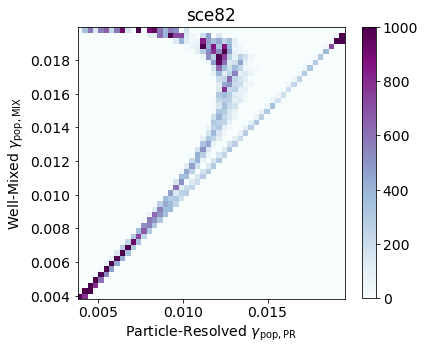

In [14]:
plt.figure(figsize=(6,5))
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
x = df.iloc[:, 1].ravel()
y = df.iloc[:, 2].ravel()
a = plt.hist2d(x, y, bins=50, cmap=plt.cm.BuPu, vmin=0, vmax=1e3)#, cmap=df.iloc[:, 4].ravel())#s=30,facecolors='none', edgecolors='k')#, c=df_ngt["chi"].ravel())
plt.colorbar()
plt.xlabel(r'Particle-Resolved $\gamma_{\rm pop,PR}$')
plt.ylabel(r'Well-Mixed $\gamma_{\rm pop,MIX}$')
# cbar.ax.set_ylabel('$\omega_i$')
plt.title('sce82')

(199419, 5)
(213581, 5)
(148583, 5)
(156068, 5)
(148765, 5)
(241682, 5)
(142818, 5)
(214829, 5)
(140726, 5)
(188548, 5)
(181190, 5)
(257572, 5)
(257246, 5)
(188086, 7)
(219728, 5)


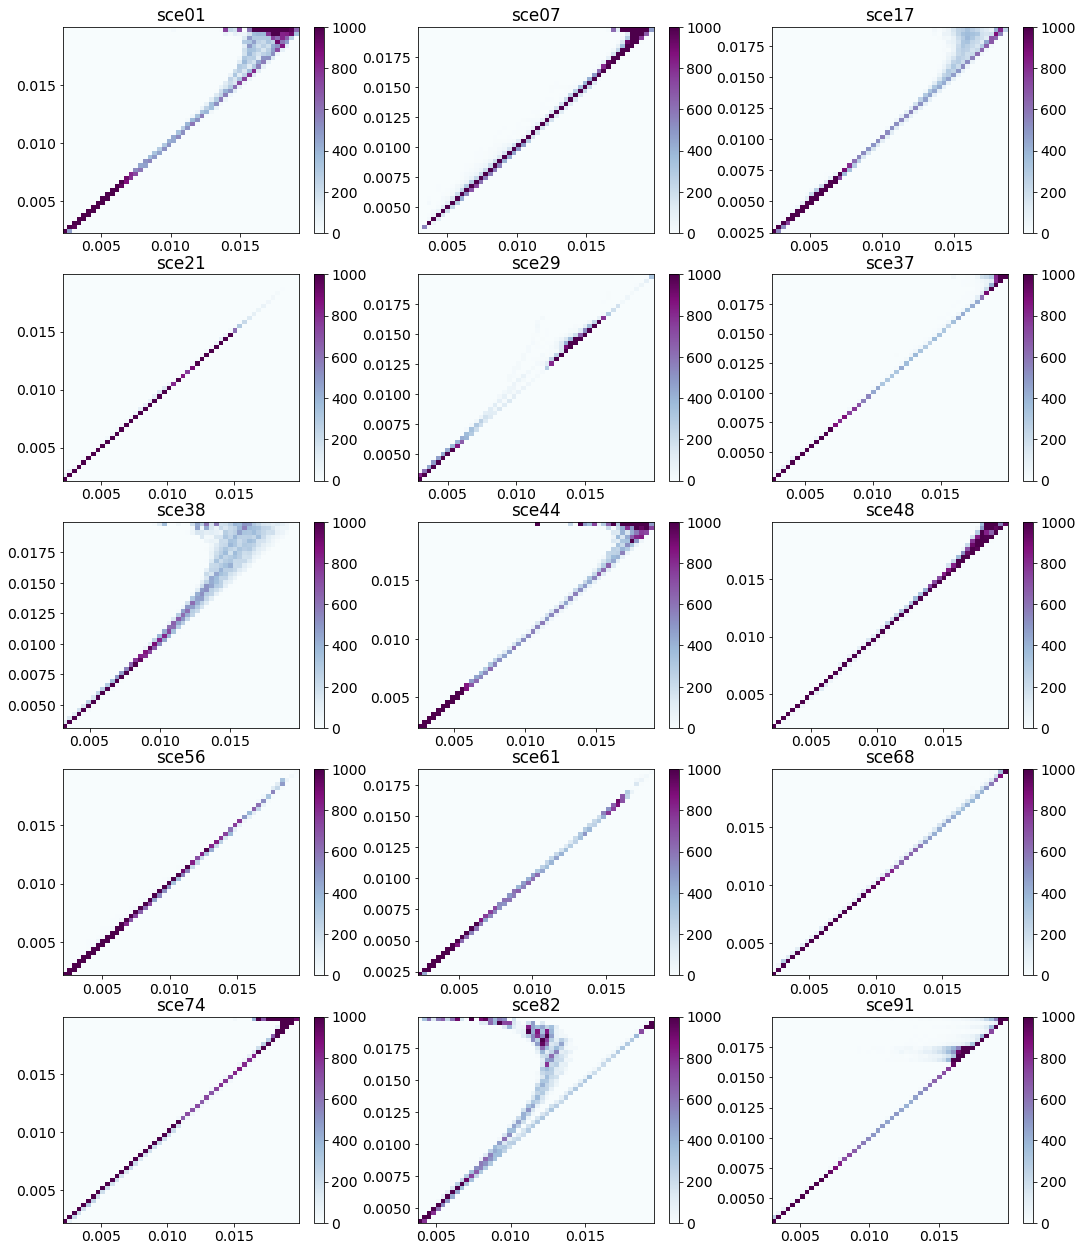

In [15]:
s = pd.Series(['01','07','17','21','29','37','38','44','48','56','61','68','74','82','91'])
plt.figure(figsize=(18,22))

for i in range(15):
    f_i="sce_completed/scenarios/scenario_00" + s[i] + "/gamma_part.csv"
    df_i = pd.read_csv(f_i, delim_whitespace=True, header=None)
    print(df_i.shape)
    
    plt.subplot(5,3,i+1)
    x = df_i.iloc[:, 1].ravel()
    y = df_i.iloc[:, 2].ravel()
    a = plt.hist2d(x, y, bins=50, cmap=plt.cm.BuPu, vmin=0, vmax=1e3)
    plt.colorbar()
#     plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
    #plt.xlabel(r'Particle-Resolved $\gamma_{\rm pop,PR}$')
    #plt.ylabel(r'Well-Mixed $\gamma_{\rm pop,MIX}$')
    #cbar.ax.set_ylabel('Organic Mass' + r'$(ng /m^3)$')
    plt.title('sce' + s[i])
    

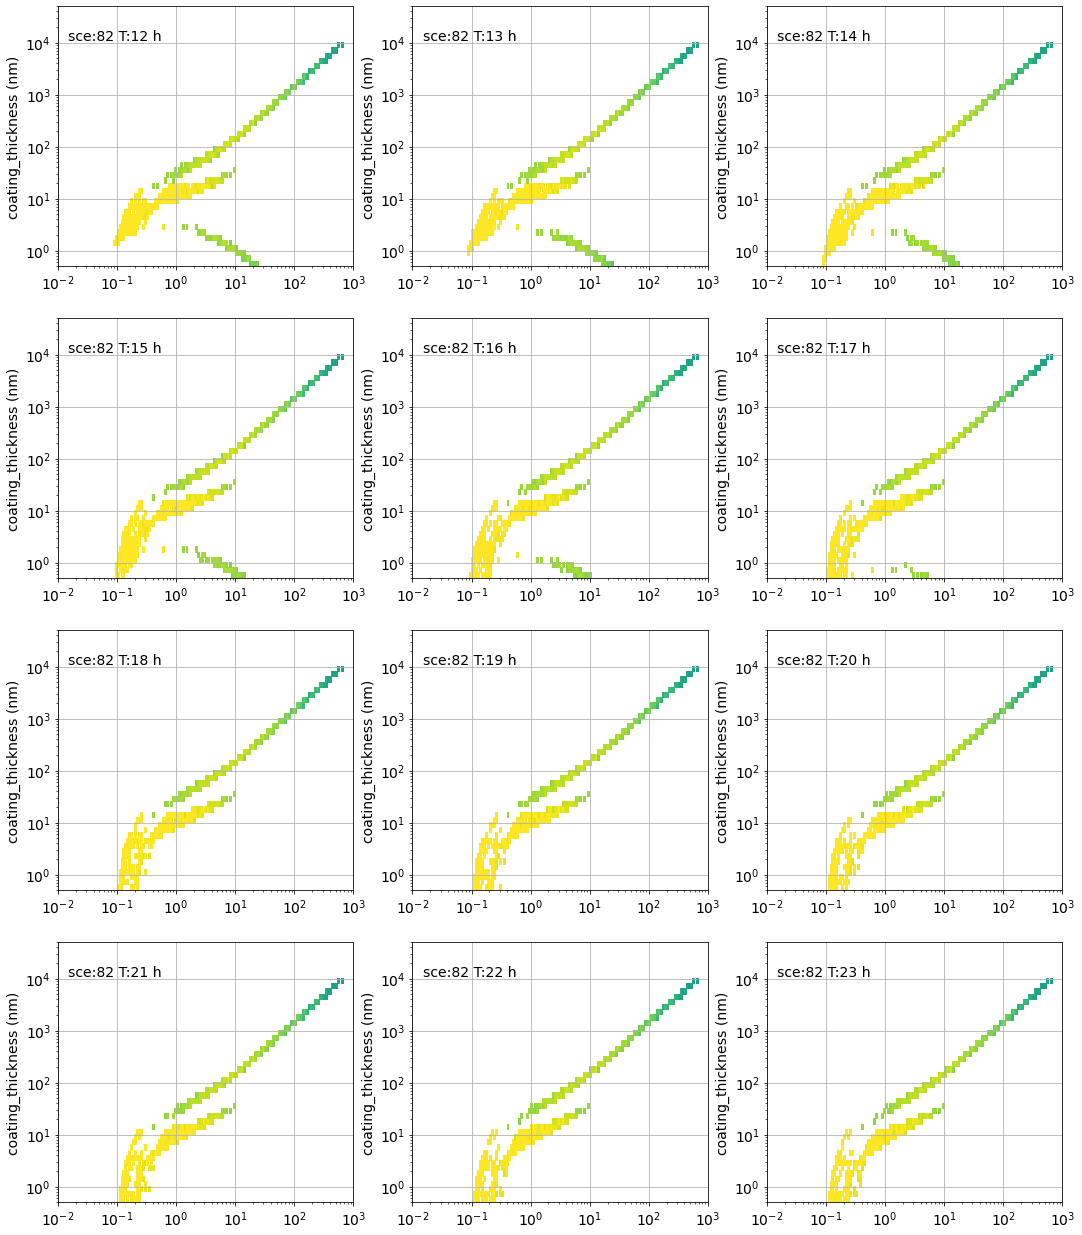

In [16]:
directory = 'sce_completed/scenarios/scenario_0082'
diam_coating_dist = np.zeros((2,100,25,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            coating_edges = ncf.variables["coating_edges"].data * 1e9
            diam = ncf.variables["diam"].data * 1e6 # m to µm
            diam_coating_dist[0,sce_index, t_index,:,:] = ncf.variables["coating_dist_pr"].data * 1e9 # m to nm

plt.figure(figsize=(18,22))
X, Y = np.meshgrid(diam_edges, coating_edges)
case_index = 82
# t_index = 17

for i in range(12,24,1):
    plt.subplot(4,3,i-11)
    p = plt.pcolormesh (X, Y, diam_coating_dist[0, sce_index, i,:,:], 
                    norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e15), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')

    plt.ylim(5e-1,5e4)
    plt.ylabel('coating_thickness (nm)')
    plt.yscale('log')
    plt.text(0.015, 1.1e4, r'sce:%d T:%d h'% (sce_index, i))
    plt.grid(True)

(188086, 7)


Text(0.5, 1.0, 'sce82')

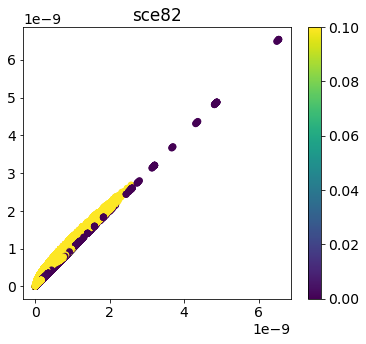

In [17]:
f1 = "sce_completed/scenarios/scenario_0082/gamma_part.csv"

df = pd.read_csv(f1, delim_whitespace=True, header=None)

# df_ngt = df[((df.index.values % 25) >= 12) & ((df.index.values % 25) < 24)]
print(df.shape)
plt.figure(figsize=(6,5))
# plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
# plt.plot([0,1e-13],[0,1e-13],'-', color='k',lw=1)
a = plt.scatter(df.iloc[:, 5].ravel(), df.iloc[:, 6].ravel(), c=df.iloc[:, 3].ravel()*1e12)#s=30,facecolors='none', edgecolors='k')#, c=df_ngt["chi"].ravel())
cbar = plt.colorbar(a)
plt.clim(0,0.1)
# plt.xlabel(r'Particle-Resolved $\gamma_{\rm pop,PR}$')
# plt.ylabel(r'Composition-Averaged $\gamma_{\rm pop,MIX}$')
# cbar.ax.set_ylabel('$\omega_i$')
plt.title('sce82')

(73280, 7)
(105386, 7)


<ipython-input-31-46ad71fe8ce3>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1e5)
<ipython-input-31-46ad71fe8ce3>:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1e5)


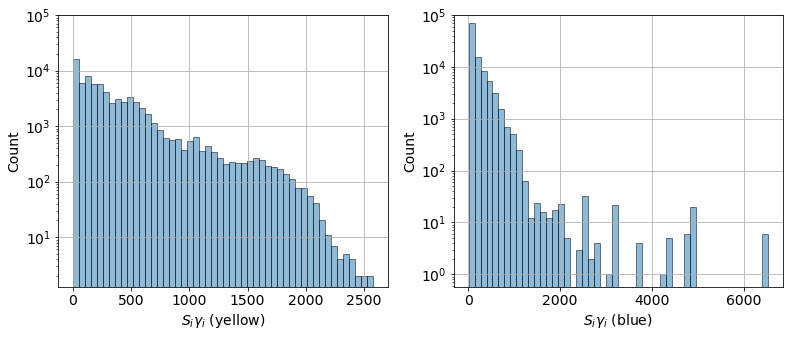

In [31]:
df_hiorg = df[((df.iloc[:, 3].ravel()*1e12) >= 0.1)]
df_loworg = df[((df.iloc[:, 3].ravel()*1e12) <= 0.01)]
print(df_hiorg.shape)
print(df_loworg.shape)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(x = df_hiorg.iloc[:,5].ravel()*1e12, bins = 50, edgecolor= 'k', alpha=0.5)
plt.xlabel(r'$S_i\gamma_i$ (yellow)')
plt.yscale('LOG')
plt.ylabel('Count')
plt.ylim(0,1e5)
plt.grid()

plt.subplot(1,2,2)
plt.hist(x = df_loworg.iloc[:,5].ravel()*1e12, bins = 50, edgecolor= 'k', alpha=0.5)
plt.xlabel(r'$S_i\gamma_i$ (blue)')
plt.yscale('LOG')
plt.ylabel('Count')
plt.ylim(0,1e5)
plt.grid()